# 1. Import Library

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import glob

# 2. Write Function

In [15]:
def LoR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [16]:
def LoR_find_W_local_mul_class(X, Y, epoch = 1000, lr = 0.05): #<<<<<<<<
    Xb = LoR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    K = Y.shape[1]
    W = np.random.randn(D_1, K)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        Yhat = LoR_find_Yhat_mul_class(X, W)
        error = (-Y*np.log(Yhat)).sum()
        error_list.append(error)
        S = np.dot(Xb.T, Y-Yhat)
        W = W + (lr/N)*S
    return W, error_list

In [17]:
def LoR_find_Yhat_mul_class(X, W):
    Xb = LoR_create_Xb(X)
    Z = np.dot(Xb, W)
    Yhat = np.exp(Z)/np.exp(Z).sum(axis=1, keepdims = True)
    return Yhat

In [18]:
def find_error_mul_class(Y, Yhat):
    N = Y.shape[0]
    Y_argmax = np.argmax(Y, axis=1)
    Yhat_argmax = np.argmax(Yhat, axis=1)
    error = 100*(Y_argmax != Yhat_argmax).sum()/N
    return error

In [19]:
def create_onehot_target(label):
    K = len(np.unique(label))
    N = label.shape[0]
    onehot = np.zeros([N, K])
    for i in range(N):
        onehot[i, label[i, 0]] = 1
    return onehot

# 3. Read Data & Prepare Data

In [20]:
#glob.glob("train/*.jpg")

In [39]:
image_train = np.empty((0,15552), int) #54*96*3=15552
label_train = np.empty((0,1), int)

num_train = 2326 #2326
i = 0
for image_path in glob.glob("train/*.jpg"):
    image = imageio.imread(image_path)
    image = np.array(image)
    image = image.reshape(1, -1)
    image_train = np.vstack((image_train, image))
    
    label = int(image_path[::-1][4])
    label_train = np.vstack((label_train, label))
    
    i += 1
    if i >= num_train:
        break

print(image_train.shape)
print(label_train.shape)

(2326, 15552)
(2326, 1)


In [22]:
X_Train = image_train/255.0
Y_Train = create_onehot_target(label_train)

In [40]:
image_test = np.empty((0,15552), int) #54*96*3=15552
label_test = np.empty((0,1), int) 

num_test = 1392 #1392
i = 0
for image_path in glob.glob("test/*.jpg"):
    image = imageio.imread(image_path)
    image = np.array(image)
    image = image.reshape(1, -1)
    image_test = np.vstack((image_test, image))
    
    label = int(image_path[::-1][4])
    label_test = np.vstack((label_test, label))
    
    i += 1
    if i >= num_test:
        break

print(image_test.shape)
print(label_test.shape)

(1392, 15552)
(1392, 1)


In [24]:
X_Test = image_test/255.0
Y_Test = create_onehot_target(label_test)

# 4. Create Model

In [25]:
W, error_list = LoR_find_W_local_mul_class(X_Train, Y_Train)

In [26]:
W.shape

(15553, 2)

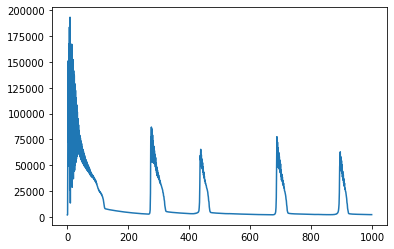

In [27]:
plt.plot(error_list)

In [29]:
Yhat_Train = LoR_find_Yhat_mul_class(X_Train, W)

In [30]:
error_Train = find_error_mul_class(Y_Train, Yhat_Train)

In [31]:
error_Train

5.803955288048152

# Save model by weight

In [32]:
import pickle

In [33]:
with open('outfile', 'wb') as fp:
    pickle.dump(W, fp)

# Read Model

In [34]:
with open ('outfile', 'rb') as fp:
    myW = pickle.load(fp)

# 5. Make Prediction

In [42]:
Yhat_Test = LoR_find_Yhat_mul_class(X_Test, W)

In [43]:
error_Test = find_error_mul_class(Y_Test, Yhat_Test)

In [44]:
error_Test

8.405172413793103

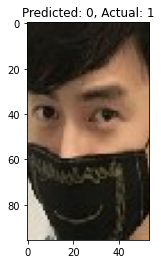

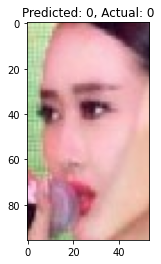

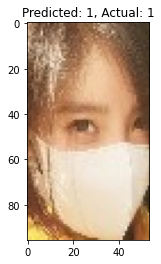

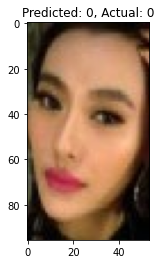

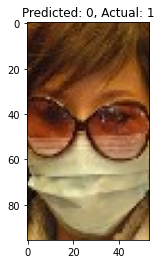

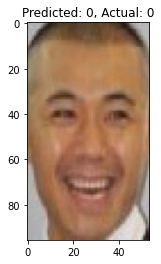

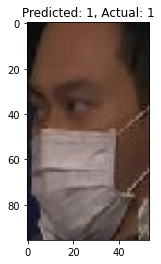

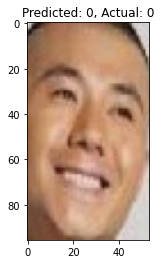

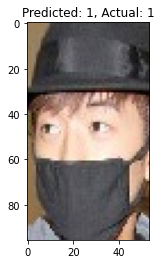

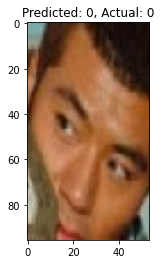

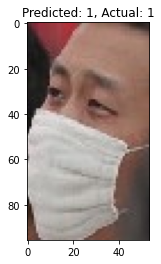

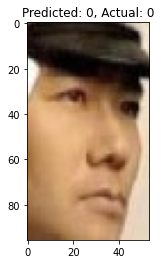

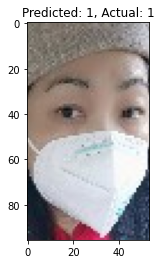

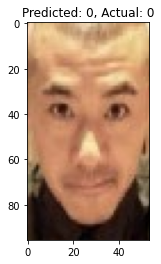

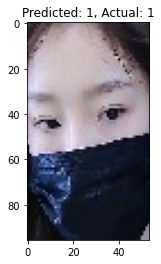

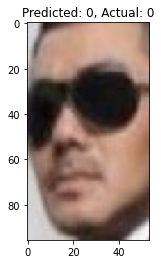

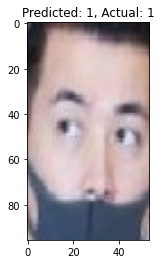

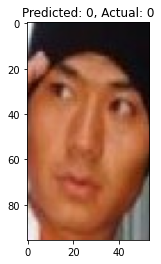

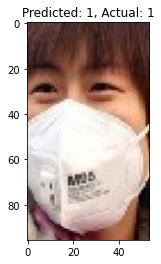

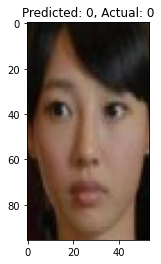

In [45]:
num_test = 20

for i, image_path in enumerate(glob.glob("test/*.jpg")):
    image = imageio.imread(image_path)
    image = np.array(image)
    
    label = int(image_path[::-1][4])
    
    predicted = np.argmax(Yhat_Test, axis=1)[i]
    
    plt.title('Predicted: {}, Actual: {}'.format(predicted, label))
    plt.imshow(image, cmap='gray')
    plt.show()
    
    if i >= num_test - 1:
        break